### Using cellpose for deep-learning powered segmentation of lattice lightsheet data

Custom cellpose module: `cellpose_1.py`

In [5]:
#We define a function use cellpose model "cyto" and enabled 3D prediction
#The function is saved as `cellpose_1.py` and should be in the same folder with the workflow file generated below inorder to function in napari-lattice


### cellpose1.py
import numpy as np
from cellpose import models


def predict_cellpose(img,model_type:str="cyto"):
    model = models.Cellpose(gpu=True, model_type=model_type)
    channels = [0,0]
    img =np.array(img)
    masks, flows, styles, diams = model.eval(img, flow_threshold=None, channels=channels, diameter=25, do_3D=True)
    return masks


Define the cellpose workflow

In [6]:
from napari_workflows import Workflow
from cellpose_1 import predict_cellpose

#We initialise a workflow
cellpose_workflow = Workflow()

#define cellpose prediction

input_arg = "input"
task_name = "cellpose"
cellpose_workflow.set(task_name,predict_cellpose,input_arg,model_type="cyto")
#Printing a workflow will show you the arguments
print(cellpose_workflow)

Workflow:
cellpose <- (<function predict_cellpose at 0x000001CDB14D41F0>, 'input', 'cyto')



Lets test the cellpose prediction workflow on deskewed image

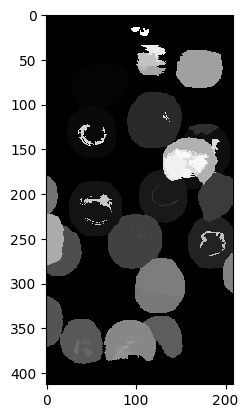

In [7]:
from skimage.io import imread,imsave
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt


img = imread("../RBC_lattice.tif")
voxel_size_x_in_microns = 0.145
voxel_size_y_in_microns = 0.145
voxel_size_z_in_microns = 0.3
deskewing_angle_in_degrees = 30

deskewed_img = cle.deskew_y(input_image = img,
                            angle_in_degrees =deskewing_angle_in_degrees,
                            voxel_size_x=voxel_size_x_in_microns,
                            voxel_size_y= voxel_size_y_in_microns,
                            voxel_size_z=voxel_size_z_in_microns,
                            linear_interpolation=True)

cellpose_workflow.set(input_arg,deskewed_img)
prediction = cellpose_workflow.get("cellpose")
cle.imshow(prediction)

In [9]:
from napari_workflows import _io_yaml_v1

_io_yaml_v1.save_workflow("cellpose_1_workflow.yml",cellpose_workflow)